In [1]:
dataset = [
    ['아메리카노', '카페라떼'], ['카페라떼', '아메리카노', '카푸치노'],
    ['바닐라라떼', '아메리카노'], ['녹차라떼', '카페라떼', '아메리카노'],
    ['카페모카', '아메리카노'], ['아메리카노', '카페라떼'],
    ['초콜릿', '아메리카노'], ['아메리카노'],
    ['카페모카', '카페라떼']
]

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_result = te.fit(dataset).transform(dataset)
#데이터프레임으로 변환
df = pd.DataFrame(te_result, columns=te.columns_)
df

,녹차라떼,바닐라라떼,아메리카노,초콜릿,카페라떼,카페모카,카푸치노
0,False,False,True,False,True,False,False
1,False,False,True,False,True,False,True
2,False,True,True,False,False,False,False
3,True,False,True,False,True,False,False
4,False,False,True,False,False,True,False
5,False,False,True,False,True,False,False
6,False,False,True,True,False,False,False
7,False,False,True,False,False,False,False
8,False,False,False,False,True,True,False


In [3]:
from mlxtend.frequent_patterns import apriori
itemset = apriori(df, use_colnames=True)
itemset
#아메리카노를 살 확률 0.88
#카페라떼를 살 확률 0.55

,support,itemsets
0,0.888889,(아메리카노)
1,0.555556,(카페라떼)


In [4]:
#support 기본값 0.5
itemset = apriori(df, min_support=0.1, use_colnames=True)
itemset

,support,itemsets
0,0.111111,(녹차라떼)
1,0.111111,(바닐라라떼)
2,0.888889,(아메리카노)
3,0.111111,(초콜릿)
4,0.555556,(카페라떼)
5,0.222222,(카페모카)
6,0.111111,(카푸치노)
7,0.111111,"(아메리카노, 녹차라떼)"
8,0.111111,"(카페라떼, 녹차라떼)"
9,0.111111,"(바닐라라떼, 아메리카노)"


In [5]:
#confidence 기본값 0.8
from mlxtend.frequent_patterns import association_rules
rules=association_rules(itemset, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(녹차라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
1,(녹차라떼),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf,0.500
2,(바닐라라떼),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
3,(초콜릿),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
4,(카페라떼),(아메리카노),0.555556,0.888889,0.444444,0.8,0.900,-0.049383,0.555556,-0.200
5,(카푸치노),(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
6,(카푸치노),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf,0.500
7,"(아메리카노, 녹차라떼)",(카페라떼),0.111111,0.555556,0.111111,1.0,1.800,0.049383,inf,0.500
8,"(카페라떼, 녹차라떼)",(아메리카노),0.111111,0.888889,0.111111,1.0,1.125,0.012346,inf,0.125
9,(녹차라떼),"(아메리카노, 카페라떼)",0.111111,0.444444,0.111111,1.0,2.250,0.061728,inf,0.625


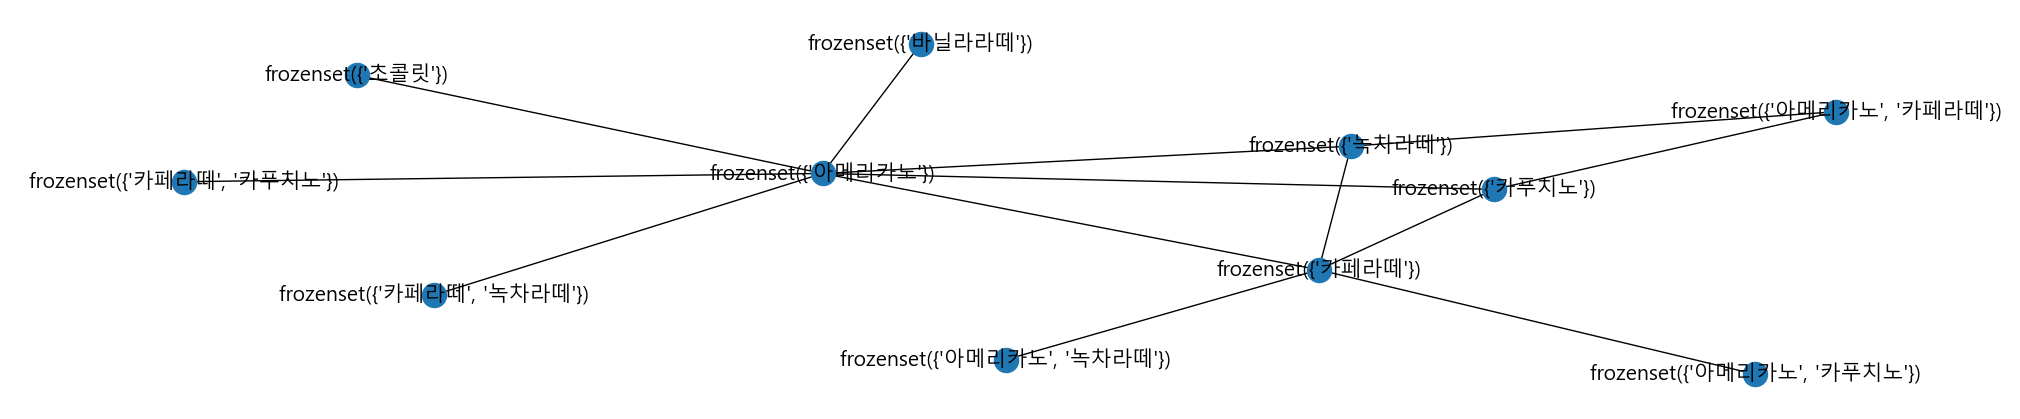

In [6]:
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import networkx as nx
import matplotlib.pyplot as plt
ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,4))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=15)